## Linear Regression _ 1

In [55]:
# import libraries & data

%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("C:\\Users\\sneha\\ML_Prob\\headbrain.csv")
print(data.shape) # data shape (rxc)
data.head() # data val
data.describe()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


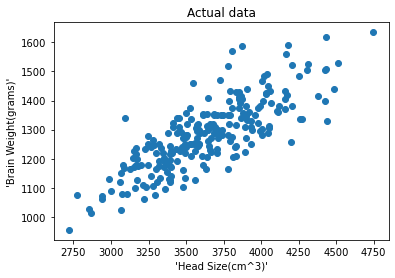

In [51]:
# taking 2 variables on  x and y axis
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

# plot actual data
plt.title("Actual data")
plt.scatter(X,Y)
plt.xlabel("'Head Size(cm^3)'")
plt.ylabel("'Brain Weight(grams)'")
#plt.legend()
plt.show()

r_squared_val =  1.0
intercept =  325.5734210494426
slope =  [0.26342934]
mean_squared_val =  5201.3840280023305
rootmean_squared_val =  72.1206213783709


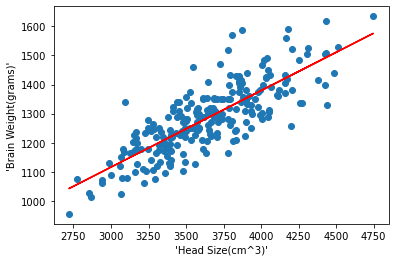

In [56]:
# import sklearn lib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as err

X = X.reshape((n, 1))

reg = LinearRegression() 

reg  = reg.fit(X,Y) # model fitting

y_predict = reg.predict(X) # prediction 

r2_score = reg.score(X,y_predict) # find r-squared val
print("r_squared_val = ",r2_score)

#To retrieve the intercept:
print("intercept = ",reg.intercept_)
#For retrieving the slope:
print("slope = ",reg.coef_)

reg_line = reg.intercept_ + reg.coef_ * X     

# find error
error = err(Y,y_predict,squared = True)
print("mean_squared_val = ",error) # MSE

error2 = err(Y,y_predict,squared = False)
print("rootmean_squared_val = ",error2) # RMSE


# plotting the fitted model
plt.scatter(X,Y)
plt.xlabel("'Head Size(cm^3)'")
plt.ylabel("'Brain Weight(grams)'")
plt.plot(X,reg_line,color = 'r') # plotting reg line
#plt.legend()
plt.show()



## Linear Regression _ 2

### STEPS: 
#### 1. import lib and read data.
#### 2. analyze data with visualization.
#### 3. decide dependent and independent variable and perform train-test-split on it.
#### 4. train algorithm using fit() operation and find intercept and slope value.
#### 5. perform prediction  and compare actual & predicted values.
#### 6. draw straight line and finally evaluate performance of model.


In [61]:
# import all libraries

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
# read data from csv file

data2 = pd.read_csv("C:\\Users\\sneha\\ML_Prob\\headbrain.csv")
data2

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [63]:
data2.describe()  # find all description of data

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


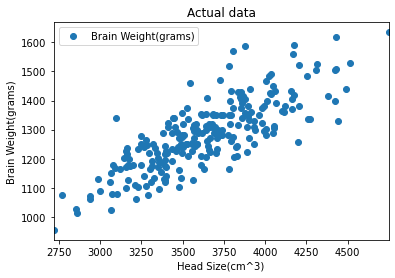

In [64]:
# plotting actual data

data2.plot(x = 'Head Size(cm^3)',y = 'Brain Weight(grams)', style = 'o' )
plt.title('Actual data')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.show()

In [65]:
# takeing data as dependent (Y) and independent variable (X)

X = data2['Head Size(cm^3)'].values.reshape(-1,1)
Y = data2['Brain Weight(grams)'].values.reshape(-1,1)



In [66]:
# import all sklearn libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [67]:
# split data into training and testing part

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)

In [68]:
# train algorithm 

reg = LinearRegression()
reg.fit(x_train,y_train) # model fitting

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
print("intercept = ",reg.intercept_)  #To retrieve the intercept
print("slope = ",reg.coef_) #To retrieve the slope

intercept =  [353.63338516]
slope =  [[0.25590475]]


#### This means "every one unit of change in HEAD SIZE, the change in the BRAIN SIZE is about 0.26%"

In [70]:
# make predictions on the test data

y_pred = reg.predict(x_test)

In [71]:
# compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual BrainSize':y_test.flatten(),'predicted Brainsize':y_pred.flatten()})
df

,Actual BrainSize,predicted Brainsize
0,1280,1306.622675
1,1321,1295.362866
2,1425,1385.441338
3,1250,1255.441725
4,1350,1321.465150
5,1408,1286.918009
6,1440,1502.133904
7,1210,1257.744868
8,1422,1385.953147
9,1405,1339.122578


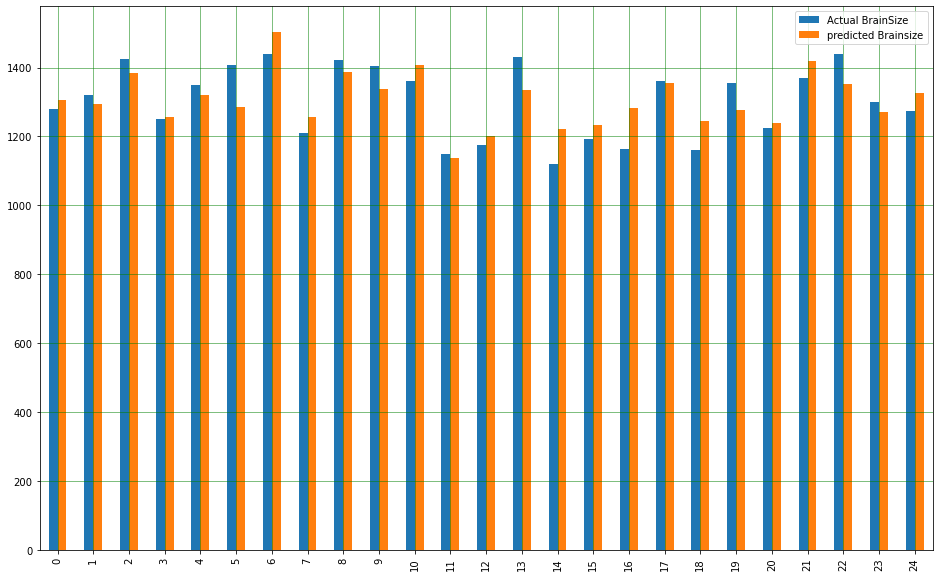

In [72]:
# visualize comparison result as a bar graph for first 25 observations

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

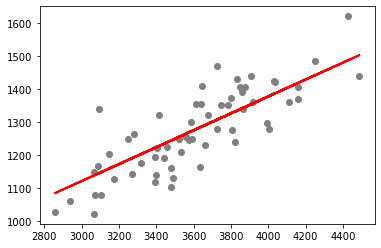

In [73]:
# plot straight line with the test data

plt.scatter(x_test,y_test,color = 'grey')
plt.plot(x_test,y_pred,color = 'red',linewidth=2)
plt.show()

In [74]:
# evaluate the performance of the algorithm

import numpy as np

print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('Mean squared Error:',mean_squared_error(y_test,y_pred,squared = True))
print('Root Mean squared Error:',mean_squared_error(y_test,y_pred,squared = False))
print('Root Mean squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r_squared value:',reg.score(y_test,y_pred))

Mean Absolute Error: 59.995743221875
Mean squared Error: 5264.955252408745
Root Mean squared Error: 72.56001138649818
Root Mean squared Error: 72.56001138649818
r_squared value: -40.668140296924285
